# Давар Рафаил 4215
 ## Лабораторная работа № 1
## 2 Вариант

## ИСПОЛЬЗОВАНИЕ НЕЙРОННЫХ СЕТЕЙ ПРЯМОГО РАСПРОСТРАНЕНИЯ ДЛЯ РЕШЕНИЯ ЗАДАЧ КЛАССИФИКАЦИИ

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.70.0-cp310-cp310-macosx_12_0_universal2.whl.metadata (3.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached tensorflow_io_gcs_filesystem-0.3

Перед тем как загрузить данные, нужно импортировать библиотеки, которые будем использовать: tensorflow и keras (для работы с нейронными сетями), numpy (для работы с массивами данных), matplotlib.pyplot (библиотека для визуализации изображений).

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Загрузим датасет MNIST из библиотеки TensorFlow при помощи команды keras.datasets.minst.load_data().

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 39s 3us/step


 Преобразуем метки классов в one-hot encoding

In [19]:

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


Нормализуем данные (делаем значения от 0 до 1)

In [24]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


Создадим список имен классов для удобного отображения и визуализируем несколько изображений из датасета.

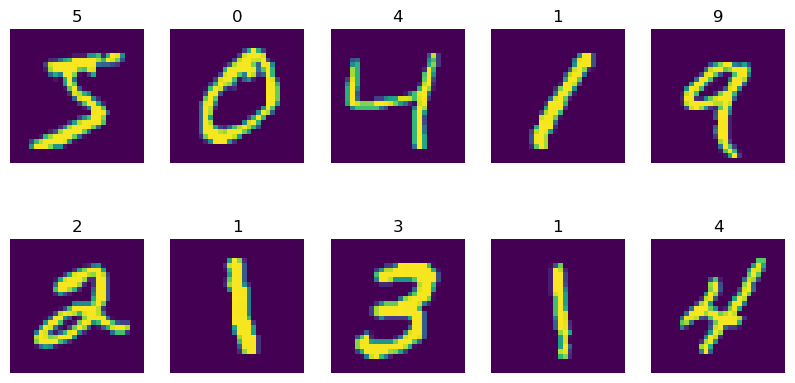

In [29]:
# Выведем несколько изображений с их метками
class_names = ['0', '1', '2', '3', '4',
 '5', '6', '7', '8', '9']
plt.figure(figsize=(10,5))
for i in range(10):
 plt.subplot(2, 5, i + 1) # Создаем сетку 2×5
 plt.imshow(x_train[i]) # Отображаем i-е изображение
 plt.title(class_names[np.argmax(y_train[i])]) # Подписываем название класса
 plt.axis("off") # Убираем оси
plt.show()


In [31]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28, 1)), # Преобразуем 28x28x1 в вектор 784 элементов
 keras.layers.Dense(512, activation='relu'), # Скрытый слой с 512 нейронами и ReLU
 keras.layers.Dense(256, activation='relu'), # Еще один скрытый слой
 keras.layers.Dense(10, activation='softmax')])# Выходной слой с 10 нейронами (по числу классов)

/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Сначала Flatten просто меняет форму данных, 0 параметров, далее Dense512 = (784 входов + 1 смещение) × 512 нейронов = 401,920 параметров. После слой Dense256 = (512 входов + 1 смещение) × 256 = 131,328 параметров. И последний слой Dense10 = (256 входов + 1 смещение) × 10 = 2,570 параметров. Всего: 1,706,274 параметров и все они будут обучаться. Перед обучением нейросети нужно указать, как она будет обновлять веса, измерять ошибку и оценивать качество. В данной работе решили выбрать оптимизатор Adam (Adaptive Moment Estimation). Данный оптимизатор является одним из самых популярных алгоритмов оптимизации. Он автоматически регулирует скорость обучения для каждого веса, ускоряя обучение.
Функцию потерь выбрали categorical_crossentropy. Она используется для многоклассовой классификации, если модель предсказала неверный класс, штраф (loss) будет высоким. Для оценивания работы модели будем использовать метрику качества accuracy. Она показывает, сколько предсказаний правильные.


In [35]:
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])


In [38]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6443 - loss: 1.1476 - val_accuracy: 0.8949 - val_loss: 0.3529
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9000 - loss: 0.3453 - val_accuracy: 0.9142 - val_loss: 0.2920
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9169 - loss: 0.2855 - val_accuracy: 0.9295 - val_loss: 0.2412
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9323 - loss: 0.2268 - val_accuracy: 0.9360 - val_loss: 0.2078
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9436 - loss: 0.1925 - val_accuracy: 0.9502 - val_loss: 0.1645
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9530 - loss: 0.1572 - val_accuracy: 0.9560 - val_loss: 0.1486
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9604 - loss: 0.1334 - val_accuracy: 0.9609 - val_loss: 0.1286
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9657 - loss: 0.1136 - val_accuracy: 0.

validation_data=(x_test, y_test))
После обучения нам нужно проверить, насколько хорошо модель работает на новых
данных, которых она раньше не видела. Команда .evaluate() делает следующее: прогоняет
тестовые данные через модель; вычисляет ошибку (test_loss) – насколько сильно модель
ошибается; вычисляет точность (test_acc) – процент правильных предсказаний.

In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точность на тестовых данных: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9642 - loss: 0.1181
Точность на тестовых данных: 0.9689


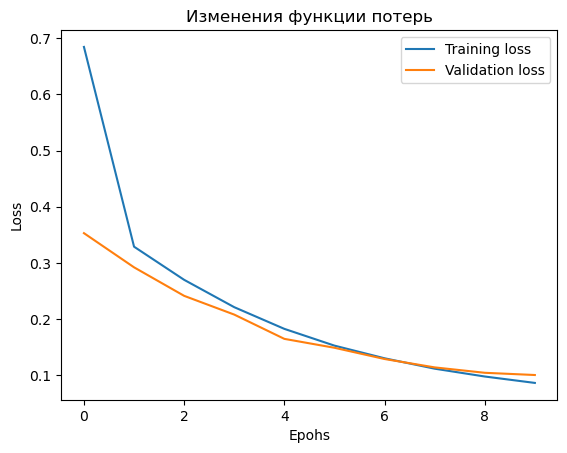

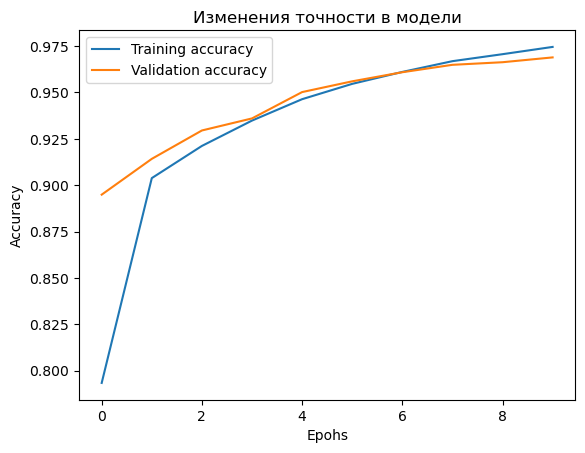

In [43]:
plt.plot(history.epoch, history.history['loss'], label='Training loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epohs')
plt.ylabel('Loss') 
plt.title('Изменения функции потерь') 
plt.legend()
plt.show()
plt.plot(history.epoch, history.history['accuracy'], label='Training accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epohs')
plt.ylabel('Accuracy') 
plt.title('Изменения точности в модели') 
plt.legend()
plt.show()
